## Sezione IMPORT

In [1]:
## IMPORT
import pandas as pd
import numpy as np

import nltk

import re# per le le espressioni regolari
from nltk.corpus import stopwords #definisce le stopwords e serve per il preprocesso della sentiment
from nltk.tokenize import word_tokenize #serve per il preprocesso della sentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer #categorizzatore della sentiment analysis
from nltk.probability import FreqDist #per calcolare la frequenza delle parole
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Lettura del Dataset

In [2]:


filename = 'palestina/Daily Public Opinion on Israel-Palestine War COPY_exported.csv'
df = pd.read_csv('Daily Public Opinion on Israel-Palestine War COPY_exported.csv')
df

,comment_id,score,self_text,subreddit,created_time
0,k4z1xzo,1,the truth is we don’t care what ur PoV is. It’...,IsraelPalestine,2023-10-15 18:53:11.000
1,k4z1w6j,1,It was another reddit post. But on lookup I se...,IsraelPalestine,2023-10-15 18:52:45.000
2,k4z1p7n,1,Particularly on western college campuses the c...,worldnews,2023-10-15 18:51:09.000
3,k4z1orj,1,What a morally abhorrent way to argue. This pe...,worldnews,2023-10-15 18:51:03.000
4,k4z1ksm,1,"Ah yes, because Mossad is *renowned* for its h...",NonCredibleDefense,2023-10-15 18:50:08.000
...,...,...,...,...,...
170232,k3sdwfc,42,US. This is bullshit,Palestine,2023-10-07 05:20:11.000
170233,k3sdixt,1,I am in the United States and it has the dotte...,Palestine,2023-10-07 05:17:23.000
170234,k3sccp2,54,In which country are you?\nSometimes maps adap...,Palestine,2023-10-07 05:08:26.000
170235,k3ritvj,116,You can't give up on something you only preten...,worldnews,2023-10-07 01:46:05.000


## Analizziamo insieme le funzionalità della nuova libreria!

In [3]:

#definiamo l'analyzer

analyzer = SentimentIntensityAnalyzer()
# definiamo il testo di prova per dare uno score
text = "I love Python!"
#definiamo l'analisi con l'analyzer
scores = analyzer.polarity_scores(text)
# printiamo
scores


{'neg': 0.0, 'neu': 0.182, 'pos': 0.818, 'compound': 0.6696}

## Indica 0.6696 che uno score nettamente positivo

In [4]:

# definiamo l'analyzer
analyzer = SentimentIntensityAnalyzer()

# Un esempio di serie di testi in inglese che possono produrre diverse analisi di sentiment 
texts = [
    "I love this product! It works great and is very affordable.",
    "This product is okay. It gets the job done, but could be better.",
    "I hate this product. It doesn't work at all and is a waste of money."
]

# creiamo un loop del testo e definiamo lo score per ognuna
for text in texts:
    scores = analyzer.polarity_scores(text)
    print(text)
    print(scores)


I love this product! It works great and is very affordable.
{'neg': 0.0, 'neu': 0.482, 'pos': 0.518, 'compound': 0.8622}
This product is okay. It gets the job done, but could be better.
{'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'compound': 0.6486}
I hate this product. It doesn't work at all and is a waste of money.
{'neg': 0.371, 'neu': 0.629, 'pos': 0.0, 'compound': -0.7579}


## Come possiamo vedere dalla serie che abbiamo creato abbiamo 3 distinti risultati(Positivo,Neutrale,Negativo)

# incominciamo ad analizzare il dataset


## Leggiamo il file csv

In [5]:
#definiamo il file name
filename = 'palestina/Daily Public Opinion on Israel-Palestine War COPY_exported.csv'
#legge il csv
df = pd.read_csv('Daily Public Opinion on Israel-Palestine War COPY_exported.csv')

#pre-analisi del testo (preprocess)
stop_words = set(stopwords.words('english'))
sia = SentimentIntensityAnalyzer()


## Definiamo la funzione per ottenere un testo pulito

In [6]:
def preprocess_text(text):   
    text = re.sub(r'http\S+', '', text) #Rimuove gli url.
    text = re.sub(r'[^a-zA-Z\s]', '', text) #Rimuove i caratteri non alphabetici utilizzando espressini regolari.
    text = text.lower() #converione del testo
    tokens = word_tokenize(text) #Tokenize the text into words. converto il testo in parole singole, chiamati tokens.
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words] #Rimuove le stopwords e le parole non tokens
    return ' '.join(tokens) # i restanti tokens li unisce in una stringa

## Definiamo la colonna con il testo pulito

In [7]:
nltk.download('punkt')
df['cleaned_text'] = df['self_text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Lettura 

In [8]:
df['cleaned_text'] 

0         truth dont care ur pov used justify murdering ...
1         another reddit post lookup see numbers werent ...
2         particularly western college campuses concept ...
3         morally abhorrent way argue person telling bel...
4         ah yes mossad renowned honesty like israel ord...
                                ...                        
170232                                          us bullshit
170233    united states dotted west bank gaza strip alth...
170234    country sometimes maps adapt countries view ma...
170235    cant give something pretended support cynical ...
170236    gt head islamic jihad denounced arab attempts ...
Name: cleaned_text, Length: 170237, dtype: object

## Creiamo un file csv dove inserire il risultato

In [9]:
df['cleaned_text'].to_csv('commenti_puliti.csv', index=False)

## Applichiamo il sentiment analyzer al nuovo testo tokenizzato

In [10]:
df['sentiment_score'] = df['cleaned_text'].apply(lambda text: sia.polarity_scores(text)['compound'])

## Risultato

In [11]:
df['sentiment_score'] 

0        -0.6836
1        -0.3839
2        -0.7506
3        -0.9100
4         0.8271
           ...  
170232   -0.5859
170233    0.4215
170234    0.0258
170235    0.0258
170236   -0.1280
Name: sentiment_score, Length: 170237, dtype: float64

## Importiamolo in csv

In [12]:
df['sentiment_score'].to_csv('score_sentiment.csv', index=False)

## Visualizzazione risultati sentiment


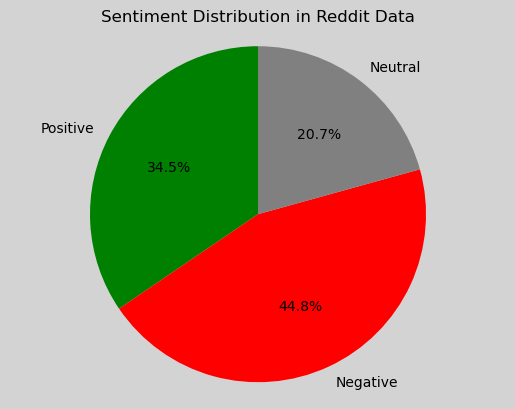

In [19]:
import matplotlib.pyplot as plt

# Definizione del calcolo per il conteggio del sentiment
positive_count = sum(1 for score in df['sentiment_score'] if score > 0)
negative_count = sum(1 for score in df['sentiment_score'] if score < 0)
neutral_count = sum(1 for score in df['sentiment_score'] if score == 0)

# Definizione di etichette, dimensioni e colori
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_count, negative_count, neutral_count]
colors = ['green', 'red', 'gray']

# Impostazione del colore dello sfondo del grafico
plt.figure(facecolor='lightgray')

# Creazione del grafico a torta
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Impostazione dell'aspetto del grafico
plt.axis('equal')
# Definizione del titolo
plt.title('Sentiment Distribution in Reddit Data')

# Mostra il grafico
plt.show()


## Definizione del dataset di studio

In [20]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

dataset = pd.read_csv('definitivo_file.csv')

## Analizziamo le frequenza delle parole utilizzate nella community

In [14]:
# Estrarre solo la colonna specifica che analizzo
specific_column = dataset['commenti_puliti']

# Converti i valori della colonna in stringhe
specific_column = specific_column.astype(str)

data = ' '.join(specific_column)

words = word_tokenize(data)

freq_dist = FreqDist(words)

print(freq_dist.most_common(170237))

# Crea un DataFrame pandas dai risultati della frequenza
df_freq = pd.DataFrame(freq_dist.items(), columns=['Parola', 'Frequenza'])

# Ordina il DataFrame per frequenza in ordine decrescente
df_freq = df_freq.sort_values(by='Frequenza', ascending=False)

df_freq.to_csv('parole_frequenza.csv', index=False)

[('israel', 47630), ('hamas', 39137), ('people', 32408), ('like', 21283), ('dont', 20389), ('gaza', 18901), ('would', 18797), ('palestinians', 18093), ('one', 14415), ('war', 14341), ('think', 13242), ('even', 12148), ('civilians', 11773), ('israeli', 11380), ('palestine', 11091), ('jews', 10827), ('get', 10767), ('palestinian', 10689), ('im', 10569), ('also', 10507), ('thats', 9966), ('know', 9954), ('us', 9889), ('want', 9620), ('right', 9583), ('see', 9315), ('land', 8588), ('time', 8295), ('going', 8260), ('support', 8233), ('world', 8212), ('many', 7931), ('way', 7500), ('years', 7440), ('well', 7234), ('say', 7022), ('go', 6903), ('much', 6868), ('doesnt', 6761), ('country', 6736), ('back', 6604), ('really', 6596), ('make', 6397), ('state', 6369), ('never', 6359), ('take', 6224), ('cant', 6188), ('could', 6116), ('good', 6091), ('israelis', 5922), ('still', 5908), ('didnt', 5858), ('youre', 5851), ('children', 5841), ('said', 5831), ('attack', 5589), ('every', 5583), ('theyre', 5

## Riportiamo Su una WordCloud il risultato della frequenza delle parole

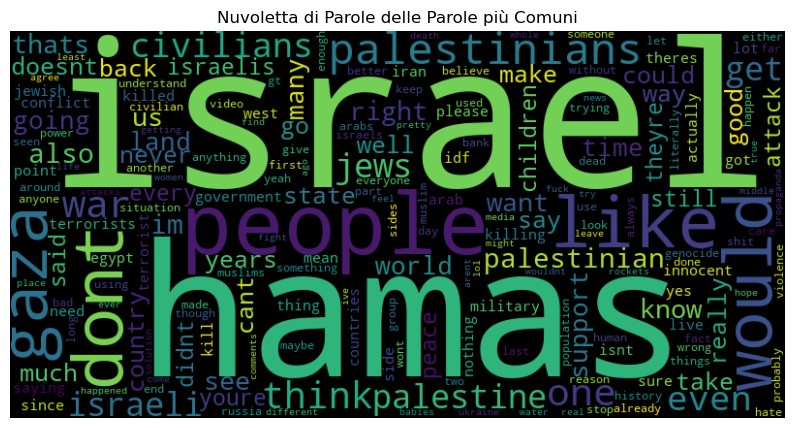

In [15]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

dataset = pd.read_csv('definitivo_file.csv')

# Estrarre solo la colonna specifica che analizzo
specific_column = dataset['commenti_puliti']

# Converti i valori della colonna in stringhe
specific_column = specific_column.astype(str)

data = ' '.join(specific_column)

words = word_tokenize(data)

freq_dist = FreqDist(words)
df_freq = pd.DataFrame(freq_dist.items(), columns=['Parola', 'Frequenza'])

# Crea una stringa contenente le parole e le relative frequenze
word_freq = {word: freq for word, freq in zip(df_freq['Parola'], df_freq['Frequenza'])}

# Crea la nuvoletta di parole con sfondo trasparente
wordcloud = WordCloud(width=800, height=400, background_color=None).generate_from_frequencies(word_freq)

# Visualizza la nuvoletta di parole
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nuvoletta di Parole delle Parole più Comuni')
plt.axis('off')

# Salva l'immagine senza sfondo
wordcloud.to_file("wordcloud_without_background.png")

plt.show()

